In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#here we load library 

In [11]:
data=pd.read_csv("ec2_cpu_utilization_5f5533.csv")

In [13]:
data

,timestamp,value
0,2014-02-14 14:27:00,51.846
1,2014-02-14 14:32:00,44.508
2,2014-02-14 14:37:00,41.244
3,2014-02-14 14:42:00,48.568
4,2014-02-14 14:47:00,46.714
...,...,...
4027,2014-02-28 14:02:00,38.474
4028,2014-02-28 14:07:00,40.352
4029,2014-02-28 14:12:00,37.912
4030,2014-02-28 14:17:00,38.458


# Basic check

In [17]:
data.head()#first five rows

,timestamp,value
0,2014-02-14 14:27:00,51.846
1,2014-02-14 14:32:00,44.508
2,2014-02-14 14:37:00,41.244
3,2014-02-14 14:42:00,48.568
4,2014-02-14 14:47:00,46.714


In [19]:
data.tail() #last five rows

,timestamp,value
4027,2014-02-28 14:02:00,38.474
4028,2014-02-28 14:07:00,40.352
4029,2014-02-28 14:12:00,37.912
4030,2014-02-28 14:17:00,38.458
4031,2014-02-28 14:22:00,37.718


In [21]:
data.sample(5) #random data used

,timestamp,value
269,2014-02-15 12:52:00,45.400
2632,2014-02-23 17:47:00,38.760
1141,2014-02-18 13:32:00,48.944
3363,2014-02-26 06:42:00,37.554
572,2014-02-16 14:07:00,44.616


In [23]:
data.info() #infomation of data its object or float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4032 entries, 0 to 4031
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  4032 non-null   object 
 1   value      4032 non-null   float64
dtypes: float64(1), object(1)
memory usage: 63.1+ KB


In [25]:
data.describe()
#here we get min ,max ,mean value

,value
count,4032.000000
mean,43.110372
std,4.303565
min,34.766000
25%,39.296000
50%,42.918000
75%,46.006000
max,68.092000


In [27]:
data.isnull().sum()
#no data is null

timestamp    0
value        0
dtype: int64

In [29]:
data=data=pd.read_csv('ec2_cpu_utilization_5f5533.csv',parse_dates=[0],index_col='timestamp')

In [31]:
## EDA

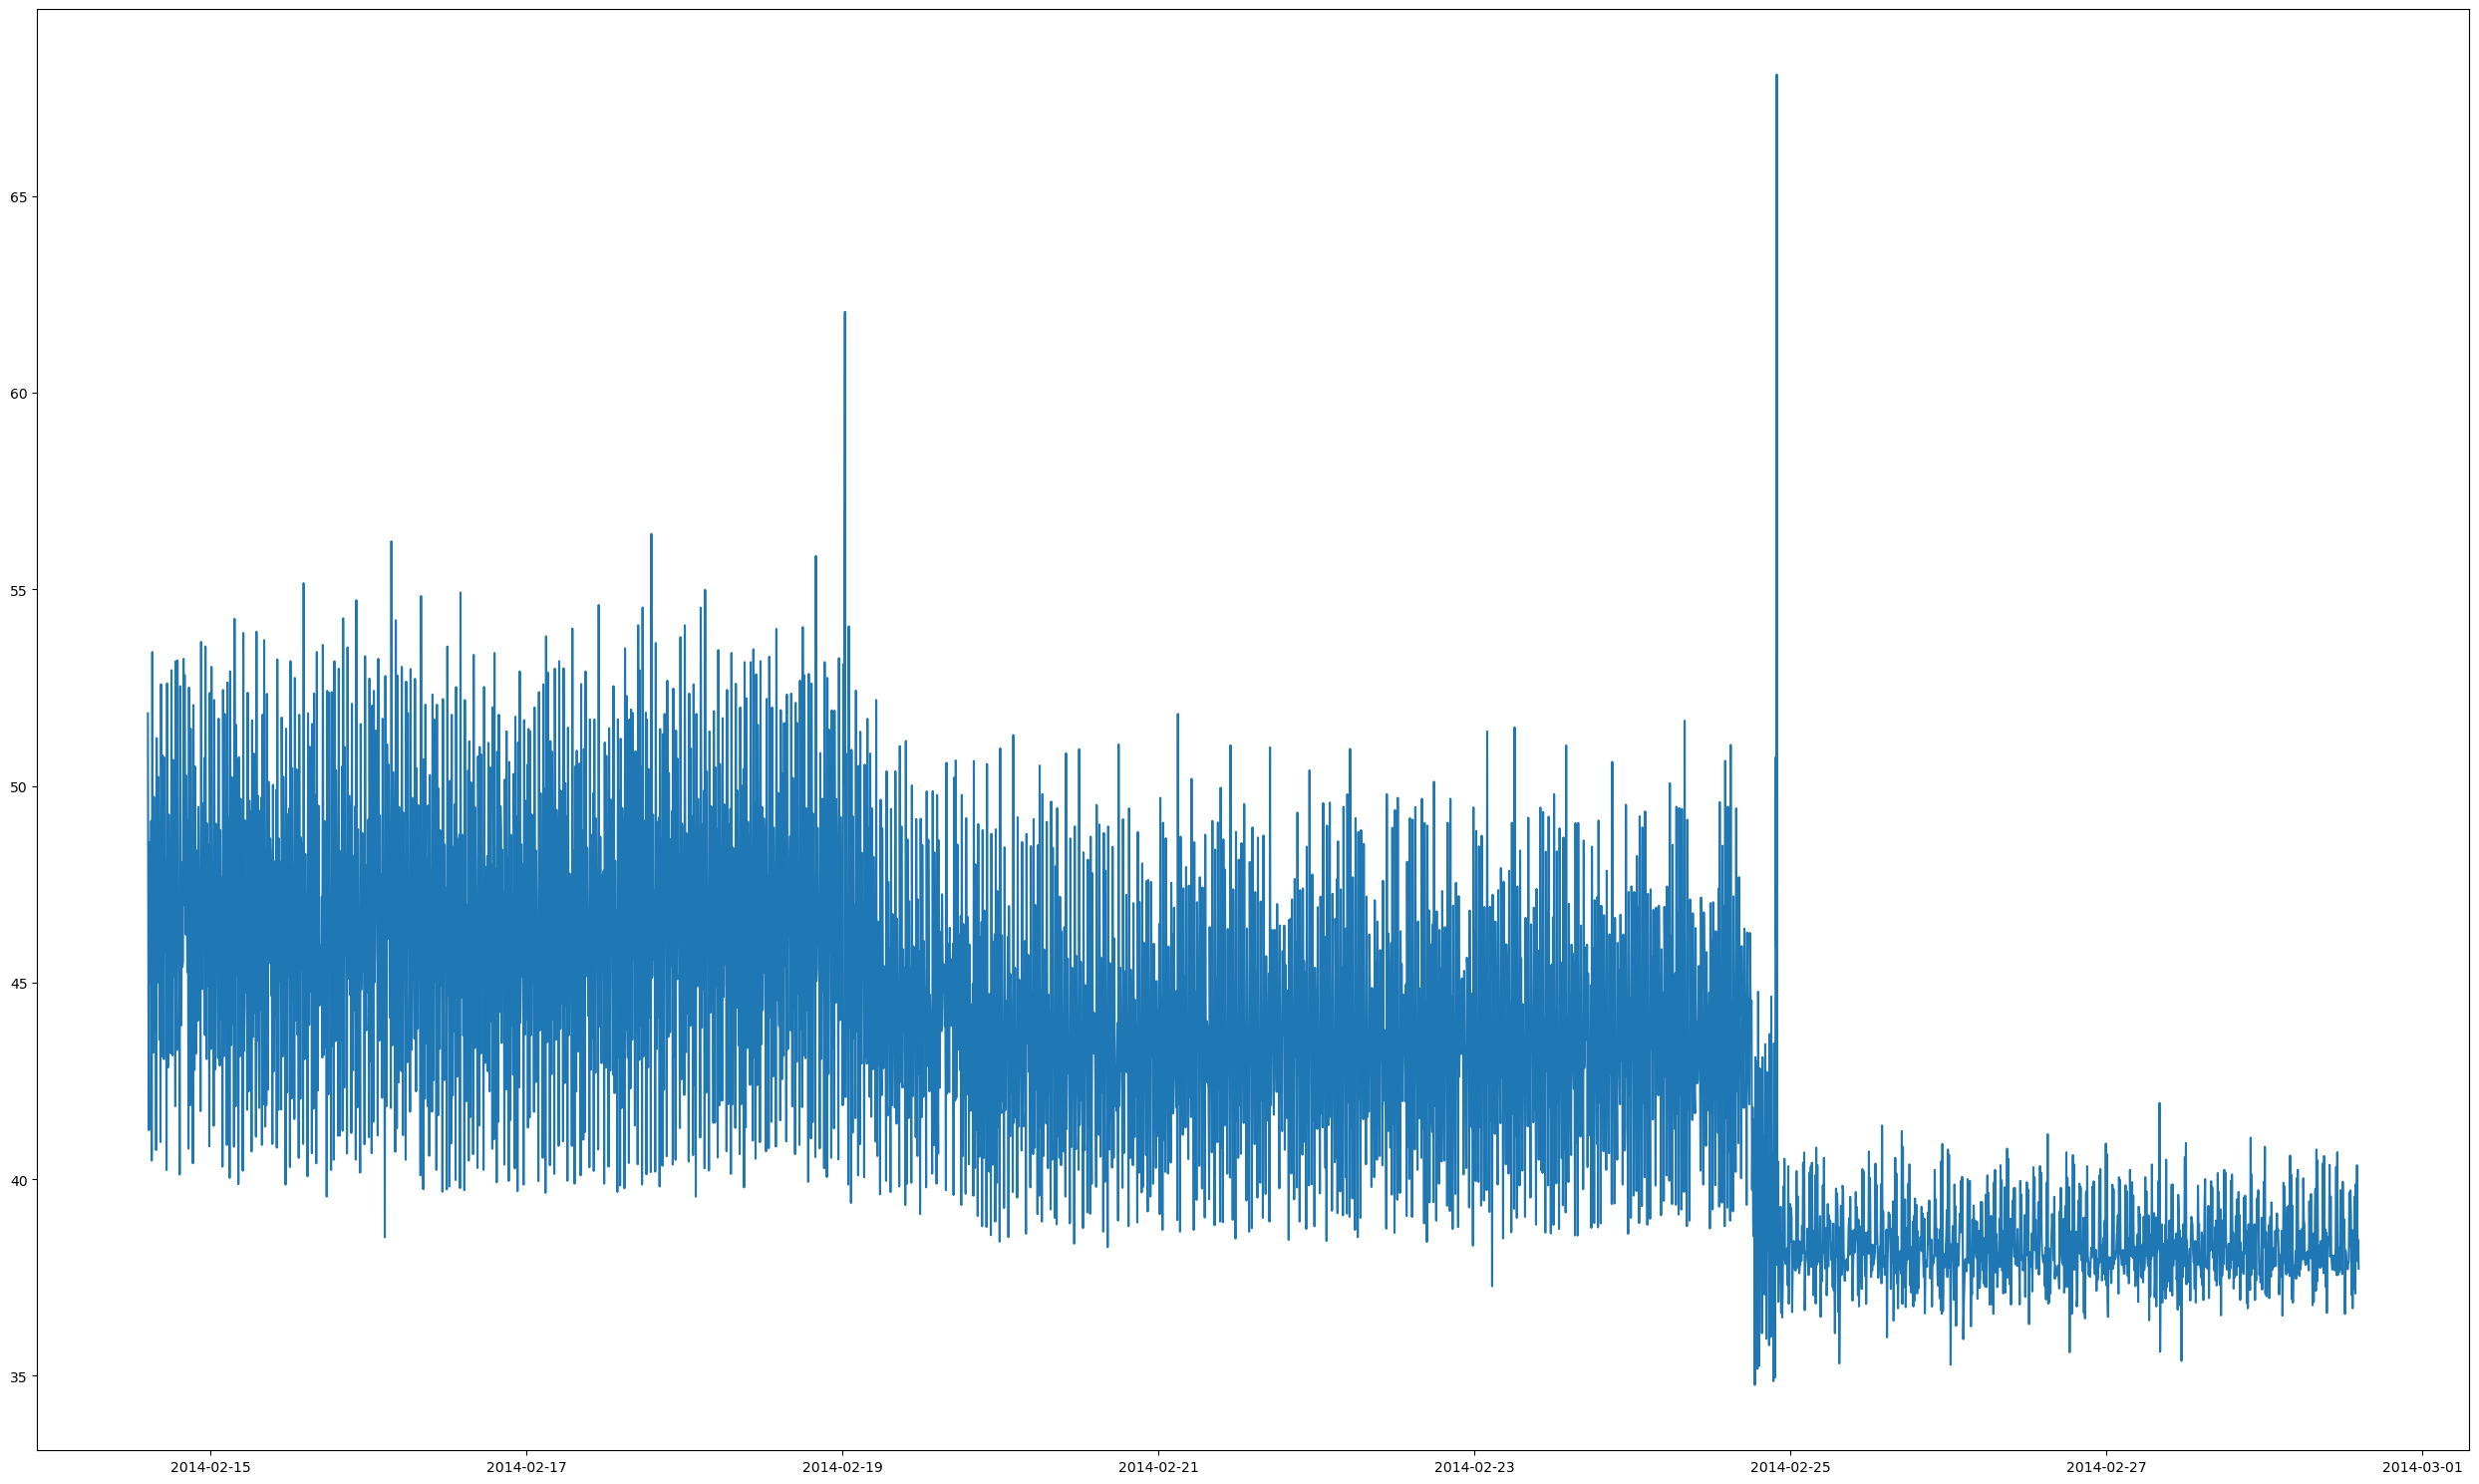

In [33]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25,15),facecolor='white')#canvas  size
plt.plot(data)#line plot 
plt.tight_layout()

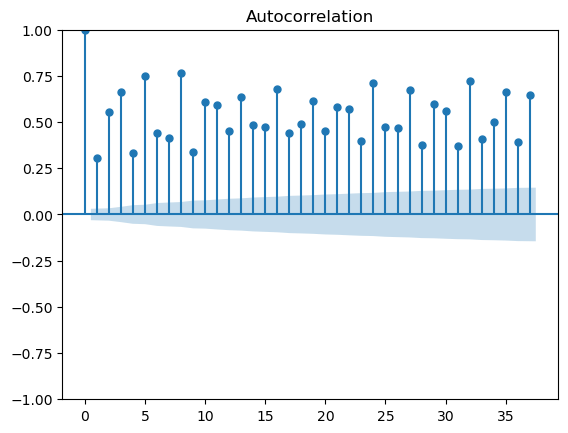

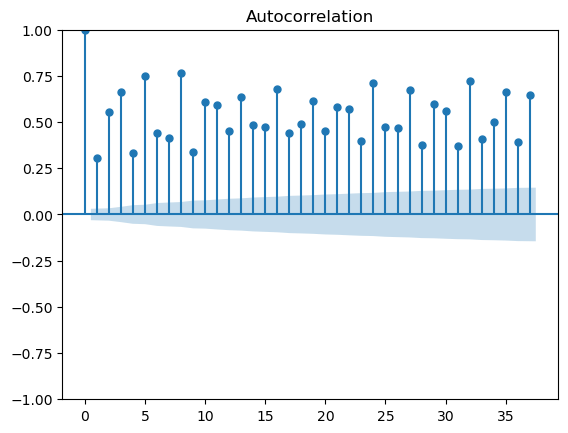

In [34]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data)

In [36]:
#From the autocorrelation plot, it is clear that given series is not stationary.

In [39]:
#We can perform the ADfuller test, a test based on hypothesis, where if the p-value is
#less than 0.05, then we can consider the time series is stationary, and if the P-value is
#greater than 0.05, then the time series is non-stationary.

In [41]:
# ADfuller Test to check stationarity 

from statsmodels.tsa.stattools import adfuller
dftest = adfuller(data.value, autolag = 'AIC')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():print("\t",key, ": ", val)

1. ADF :  -0.7335076896084304
2. P-Value :  0.8378783641046521
3. Num Of Lags :  28
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 4003
5. Critical Values :
	 1% :  -3.431984648591583
	 5% :  -2.862262298327622
	 10% :  -2.5671544870656278


In [43]:
#P-value is higher for our dataset, and we can say that the evidence of rejecting the null
#hypothesis is low; hence the time series is non-stationary.

In [45]:
data

,value
timestamp,
2014-02-14 14:27:00,51.846
2014-02-14 14:32:00,44.508
2014-02-14 14:37:00,41.244
2014-02-14 14:42:00,48.568
2014-02-14 14:47:00,46.714
...,...
2014-02-28 14:02:00,38.474
2014-02-28 14:07:00,40.352
2014-02-28 14:12:00,37.912


In [47]:
## making it stationary by taking difference of 1
data1=data.diff(periods=1) #This means calculating the change in your row(s)/column(s) over a set number of periods. Or simply, 
#pandas diff will subtract 1 cell value from another cell value within the same index.

In [49]:
data1 # Series integrated to the order of 1

,value
timestamp,
2014-02-14 14:27:00,NaN
2014-02-14 14:32:00,-7.338
2014-02-14 14:37:00,-3.264
2014-02-14 14:42:00,7.324
2014-02-14 14:47:00,-1.854
...,...
2014-02-28 14:02:00,-1.404
2014-02-28 14:07:00,1.878
2014-02-28 14:12:00,-2.440


In [51]:
data1=data1.iloc[1:] #null value discarded
data1

,value
timestamp,
2014-02-14 14:32:00,-7.338
2014-02-14 14:37:00,-3.264
2014-02-14 14:42:00,7.324
2014-02-14 14:47:00,-1.854
2014-02-14 14:52:00,-1.728
...,...
2014-02-28 14:02:00,-1.404
2014-02-28 14:07:00,1.878
2014-02-28 14:12:00,-2.440


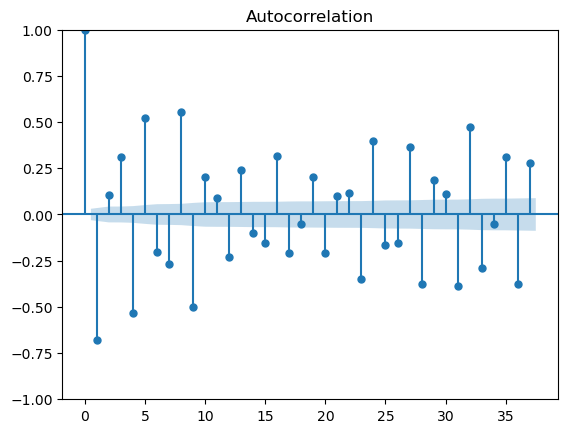

In [53]:
plot_acf(data1); # autocorrelation plot 

In [55]:
data2=data1.diff(periods=1) # differencing applied to data1

In [57]:
data2=data2.iloc[1:] # integrated to the order of 2

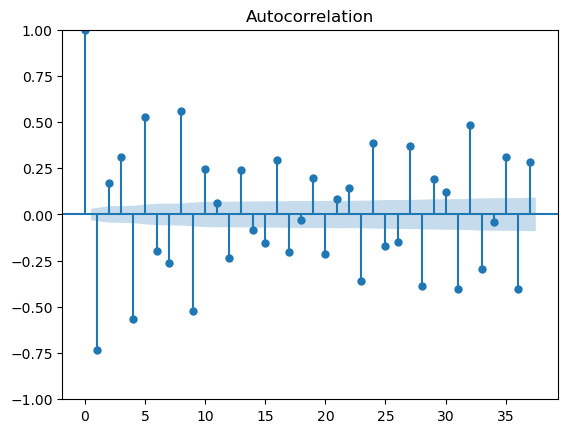

In [59]:
plot_acf(data2);

In [61]:
data2.shape#shape of the data rows and columns


(4030, 1)

In [63]:
## Creating training and test sets
train=data2[:100] #from 0th row to 99th row - traning data
test=data2[100:] #from 100th row to end - testing data

In [65]:
test.info()#info about datatype and null value

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3930 entries, 2014-02-14 22:57:00 to 2014-02-28 14:22:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   3930 non-null   float64
dtypes: float64(1)
memory usage: 61.4 KB


In [67]:
## Applying autoregressive model
#from statsmodels.tsa.ar_model import AR
##from statsmodels.tsa.ar_model import AutoReg

from statsmodels.tsa.ar_model import AutoReg
import warnings
warnings.filterwarnings('ignore')

In [69]:

#ar_select_order : gives the best lags ordered as an array

# to select the optimal values for lags
from statsmodels.tsa.ar_model import ar_select_order
mod = ar_select_order(data1,maxlag=15,glob=True)
mod.ar_lags

# select_order: selects the best number of lags
# maxlag: The maximum lag to consider
# glob: global search across all combinations of lags

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

In [70]:
## model creation
ar_model=AutoReg(train,lags=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]) ## object creation with lags specified
ar_model_fit=ar_model.fit() #training the model

In [71]:
##making prediction
prediction=ar_model_fit.predict(start=100,end=142)

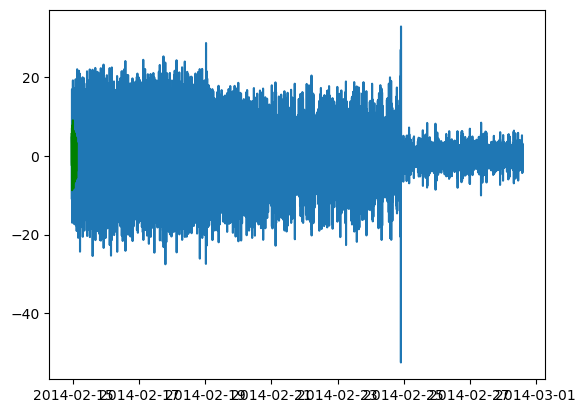

In [72]:
plt.plot(test)
plt.plot(prediction,color='green') #graph of test vs prediction

In [73]:
## ARIMA Model

In [74]:
## importing the library
from statsmodels.tsa.arima.model import ARIMA

In [75]:
##Model object creation and fitting the model
model_arima = ARIMA(train, order=(1,1,0))#order= p,d,q

model_arima_fit = model_arima.fit()#training

In [76]:
##Model object creation and fitting the model
model_arima = ARIMA(train, order=(1,1,0))#order= p,d,q

model_arima_fit = model_arima.fit()#training

In [77]:
## evaluate the model
print(model_arima_fit.aic)

808.6516448715189


In [78]:
## predicting the output of sample points
# predictions = model_arima_fit.forecast(steps=9)
prediction=model_arima_fit.predict(start=1,end=142)

In [79]:
prediction

2014-02-14 14:42:00    4.072820
2014-02-14 14:47:00    5.921314
2014-02-14 14:52:00    4.982534
2014-02-14 14:57:00   -6.539466
2014-02-14 15:02:00    1.749277
                         ...   
2014-02-15 02:07:00   -2.130225
2014-02-15 02:12:00   -2.130249
2014-02-15 02:17:00   -2.130232
2014-02-15 02:22:00   -2.130244
2014-02-15 02:27:00   -2.130235
Freq: 5min, Name: predicted_mean, Length: 142, dtype: float64

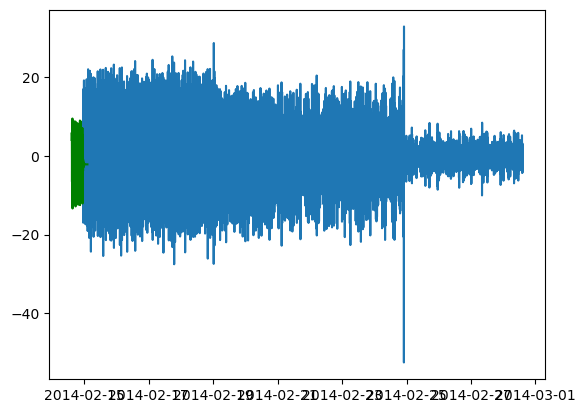

In [80]:
plt.plot(test)
plt.plot(prediction,color='green') #graph of test vs prediction

In [81]:
## Geeting the optimal values of p,q an d
import itertools

p =d= q=range(0,5)#values of p,d,q range from 0 to 4

pdq = list(itertools.product(p,d,q))
# is used to find the cartesian product from the given iterator, output is lexicographic ordered.
pdq #number of combinaton of pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (2, 3, 4),
 (2, 4, 0),
 (2, 4, 1),
 (2, 4, 2),
 (2, 4, 3),
 (2, 4, 4),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3,

In [82]:
#The Python try… except statement catches an exception. It is used to test code for an error which is written in the “try” statement.
#If an error is encountered, the contents of the “except” block are run.
list1=[]
list2=[]
for params in pdq: #iterating params over pdq
        model_arima = ARIMA(train, order=params)#training model on various pdq values
        model_arima_fit = model_arima.fit()#training
        print(params, model_arima_fit.aic)#printing parameter and aic values
        list1.append(params)
        list2.append(model_arima_fit.aic)

(0, 0, 0) 767.052437536443
(0, 0, 1) 655.90239143961
(0, 0, 2) 559.3227568339003
(0, 0, 3) 529.2562598826992
(0, 0, 4) 524.4383602722461
(0, 1, 0) 878.6003331807843
(0, 1, 1) 765.0223030862588
(0, 1, 2) 658.9085485885571
(0, 1, 3) 569.1564334714119
(0, 1, 4) 543.3586281009383
(0, 2, 0) 991.5544810799189
(0, 2, 1) 877.3362071179553
(0, 2, 2) 768.691678803085
(0, 2, 3) 667.2527080734569
(0, 2, 4) 585.3904409674576
(0, 3, 0) 1103.1814795134403
(0, 3, 1) 989.0224459617999
(0, 3, 2) 879.7136480024134
(0, 3, 3) 775.4696187614969
(0, 3, 4) 682.5338530043954
(0, 4, 0) 1213.2561322136557
(0, 4, 1) 1099.2300717756711
(0, 4, 2) 989.9652238389663
(0, 4, 3) 885.0530812369268
(0, 4, 4) 797.4045792737129
(1, 0, 0) 705.1507533572083
(1, 0, 1) 607.14149808542
(1, 0, 2) 535.1430856805495
(1, 0, 3) 528.6836801031966
(1, 0, 4) 533.2587547806634
(1, 1, 0) 808.6516448715189
(1, 1, 1) 704.7992750116425
(1, 1, 2) 611.9192223985086
(1, 1, 3) 548.1796163378086
(1, 1, 4) 572.9239075457673
(1, 2, 0) 915.987953775

In [83]:
min(list2)  # lowest aic score

489.34363824827966

In [84]:
loc=list2.index(min(list2))
loc

54

In [85]:
# pdq corresponding to lowest aic
list1[loc]

(2, 0, 4)

In [86]:
## create the final model with lowest aic score parameter
model_arima = ARIMA(train, order=(4, 0, 3))

model_arima_fit = model_arima.fit() #training

In [87]:
print(model_arima_fit.aic) # confirm aic score

508.70679366077786


In [88]:
forecast = model_arima_fit.forecast(steps=9)
forecast

2014-02-14 22:57:00     6.174302
2014-02-14 23:02:00    -5.092717
2014-02-14 23:07:00     3.136165
2014-02-14 23:12:00     3.984261
2014-02-14 23:17:00   -10.533240
2014-02-14 23:22:00     7.731715
2014-02-14 23:27:00     1.832342
2014-02-14 23:32:00    -7.438457
2014-02-14 23:37:00     5.464514
Freq: 5min, Name: predicted_mean, dtype: float64

NameError: name 'forecast25' is not defined

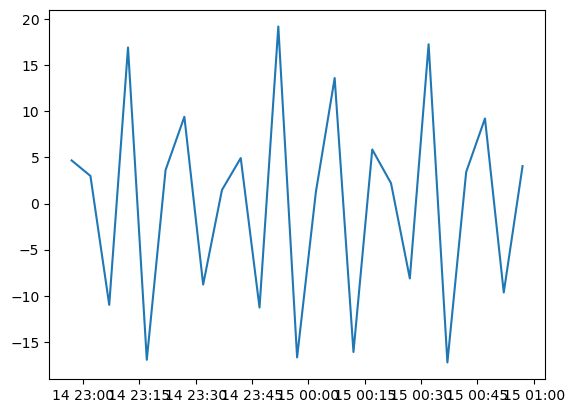

In [89]:
# Comparision of actual vs predicted for 25 values
plt.plot(test[:25])
plt.plot(forecast25,color='green') #line plot for prediction

In [ ]:
def forecast_accuracy(forecast, actual):
    mse = np.mean((forecast - actual)**2)        # MSE
    mae = np.mean(np.abs(forecast - actual))    # MAE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    
 
    return({'mse':mse, 'mae': mae, 'rmse':rmse})

forecast_accuracy(forecast25, test1)

In [ ]:
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

# Calculate root mean squared error
print(rmse(test1, forecast25))
  
# Calculate mean squared error
mean_squared_error(test1, forecast25)

# Conclusion